In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Shape of dataset: (62645, 24)
Nombre de clusters détectés: 9
Nombre de points de bruit: 1535

DBSCAN métriques :
Silhouette Score        : 0.1900
Davies-Bouldin Index    : 1.5904
Calinski-Harabasz Index : 5146.8184


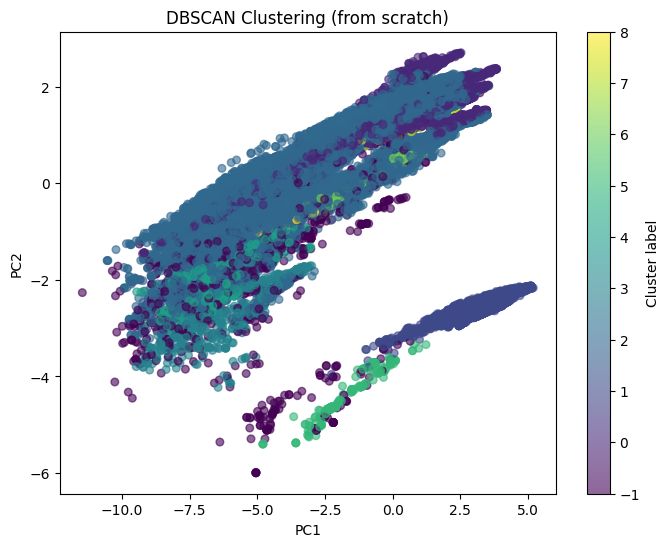

In [3]:
# ==========================================
# 1️⃣ Imports
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# ==========================================
# 2️⃣ Charger les données
# ==========================================
data_dir = "/content/drive/MyDrive/processed_unsupervised"
df = pd.read_csv(f"{data_dir}/X_scaled.csv")
X = df.values  # Dataset déjà normalisé
print(f"Shape of dataset: {X.shape}")

# ==========================================
# 3️⃣ Implémentation DBSCAN from scratch
# ==========================================
def dbscan(X, eps=0.5, min_samples=5):
    n_samples = X.shape[0]
    labels = np.full(n_samples, -1)  # -1 = bruit
    cluster_id = 0

    def region_query(point_idx):
        # Retourne les indices des points dans le voisinage de eps
        distances = np.linalg.norm(X - X[point_idx], axis=1)
        neighbors = np.where(distances <= eps)[0]
        return neighbors

    def expand_cluster(point_idx, neighbors):
        nonlocal cluster_id
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            n_idx = neighbors[i]

            # Si ce point est encore du bruit, assigner au cluster
            if labels[n_idx] == -1:
                labels[n_idx] = cluster_id

            # Si ce point n'a pas encore été assigné
            if labels[n_idx] == -1:
                labels[n_idx] = cluster_id

            # Si le point est un core point, ajouter ses voisins
            n_neighbors = region_query(n_idx)
            if len(n_neighbors) >= min_samples:
                for nn in n_neighbors:
                    if nn not in neighbors:
                        neighbors = np.append(neighbors, nn)
            i += 1

    for idx in range(n_samples):
        if labels[idx] != -1:
            continue
        neighbors = region_query(idx)
        if len(neighbors) < min_samples:
            labels[idx] = -1  # Bruit
        else:
            expand_cluster(idx, neighbors)
            cluster_id += 1

    return labels

# ==========================================
# 4️⃣ Appliquer DBSCAN
# ==========================================
eps = 2.1983
min_samples = 48

labels_dbscan = dbscan(X, eps=eps, min_samples=min_samples)
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = (labels_dbscan == -1).sum()

print(f"Nombre de clusters détectés: {n_clusters}")
print(f"Nombre de points de bruit: {n_noise}")

# ==========================================
# 5️⃣ Métriques
# ==========================================
if n_clusters > 1:
    silhouette_db = silhouette_score(X, labels_dbscan)
    db_index = davies_bouldin_score(X, labels_dbscan)
    ch_index = calinski_harabasz_score(X, labels_dbscan)

    print("\nDBSCAN métriques :")
    print(f"Silhouette Score        : {silhouette_db:.4f}")
    print(f"Davies-Bouldin Index    : {db_index:.4f}")
    print(f"Calinski-Harabasz Index : {ch_index:.4f}")
else:
    print("Impossible de calculer les métriques : moins de 2 clusters.")

# ==========================================
# 6️⃣ Visualisation (PCA)
# ==========================================
if X.shape[1] > 2:
    X_vis = PCA(n_components=2).fit_transform(X)
else:
    X_vis = X

plt.figure(figsize=(8, 6))
plt.scatter(
    X_vis[:, 0],
    X_vis[:, 1],
    c=labels_dbscan,
    cmap='viridis',
    s=30,
    alpha=0.6
)
plt.title("DBSCAN Clustering (from scratch)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster label")
plt.show()


Shape of dataset: (62645, 24)
Nombre de clusters détectés: 699
Nombre de points de bruit: 10380

DBSCAN métriques :
Silhouette Score        : -0.0636
Davies-Bouldin Index    : 1.2511
Calinski-Harabasz Index : 219.5338


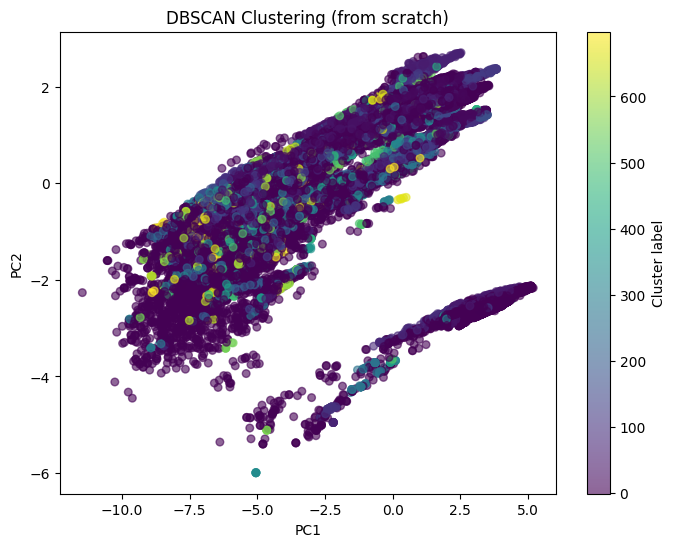

In [ ]:
# ==========================================
# 1️⃣ Imports
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# ==========================================
# 2️⃣ Charger les données
# ==========================================
data_dir = "/content/drive/MyDrive/processed_unsupervised"
df = pd.read_csv(f"{data_dir}/X_scaled.csv")
X = df.values  # Dataset déjà normalisé
print(f"Shape of dataset: {X.shape}")

# ==========================================
# 3️⃣ Implémentation DBSCAN from scratch
# ==========================================
def dbscan(X, eps=0.5, min_samples=5):
    n_samples = X.shape[0]
    labels = np.full(n_samples, -1)  # -1 = bruit
    cluster_id = 0

    def region_query(point_idx):
        # Retourne les indices des points dans le voisinage de eps
        distances = np.linalg.norm(X - X[point_idx], axis=1)
        neighbors = np.where(distances <= eps)[0]
        return neighbors

    def expand_cluster(point_idx, neighbors):
        nonlocal cluster_id
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            n_idx = neighbors[i]

            # Si ce point est encore du bruit, assigner au cluster
            if labels[n_idx] == -1:
                labels[n_idx] = cluster_id

            # Si ce point n'a pas encore été assigné
            if labels[n_idx] == -1:
                labels[n_idx] = cluster_id

            # Si le point est un core point, ajouter ses voisins
            n_neighbors = region_query(n_idx)
            if len(n_neighbors) >= min_samples:
                for nn in n_neighbors:
                    if nn not in neighbors:
                        neighbors = np.append(neighbors, nn)
            i += 1

    for idx in range(n_samples):
        if labels[idx] != -1:
            continue
        neighbors = region_query(idx)
        if len(neighbors) < min_samples:
            labels[idx] = -1  # Bruit
        else:
            expand_cluster(idx, neighbors)
            cluster_id += 1

    return labels

# ==========================================
# 4️⃣ Appliquer DBSCAN
# ==========================================
eps = 0.5
min_samples = 5

labels_dbscan = dbscan(X, eps=eps, min_samples=min_samples)
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = (labels_dbscan == -1).sum()

print(f"Nombre de clusters détectés: {n_clusters}")
print(f"Nombre de points de bruit: {n_noise}")

# ==========================================
# 5️⃣ Métriques
# ==========================================
if n_clusters > 1:
    silhouette_db = silhouette_score(X, labels_dbscan)
    db_index = davies_bouldin_score(X, labels_dbscan)
    ch_index = calinski_harabasz_score(X, labels_dbscan)

    print("\nDBSCAN métriques :")
    print(f"Silhouette Score        : {silhouette_db:.4f}")
    print(f"Davies-Bouldin Index    : {db_index:.4f}")
    print(f"Calinski-Harabasz Index : {ch_index:.4f}")
else:
    print("Impossible de calculer les métriques : moins de 2 clusters.")

# ==========================================
# 6️⃣ Visualisation (PCA)
# ==========================================
if X.shape[1] > 2:
    X_vis = PCA(n_components=2).fit_transform(X)
else:
    X_vis = X

plt.figure(figsize=(8, 6))
plt.scatter(
    X_vis[:, 0],
    X_vis[:, 1],
    c=labels_dbscan,
    cmap='viridis',
    s=30,
    alpha=0.6
)
plt.title("DBSCAN Clustering (from scratch)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster label")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Shape of dataset: (62645, 24)
Nombre de clusters détectés: 122
Nombre de points de bruit: 21136

DBSCAN métriques :
Silhouette Score        : -0.0739
Davies-Bouldin Index    : 1.2566
Calinski-Harabasz Index : 656.9884


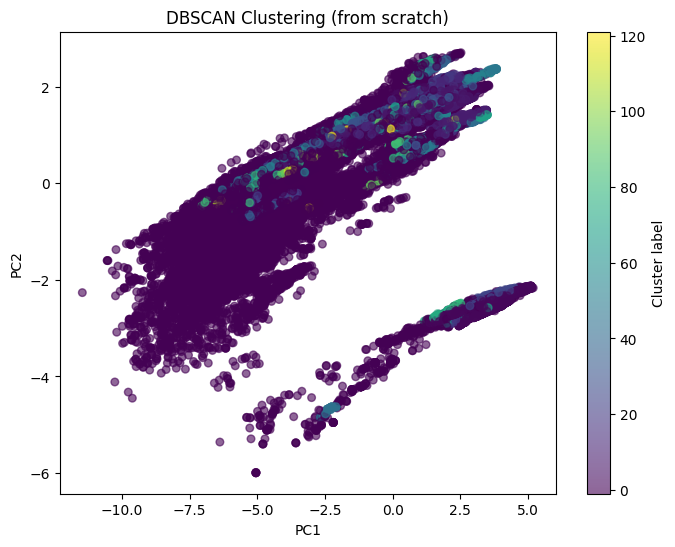

In [ ]:
# ==========================================
# 1️⃣ Imports
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# ==========================================
# 2️⃣ Charger les données
# ==========================================
data_dir = "/content/drive/MyDrive/processed_unsupervised"
df = pd.read_csv(f"{data_dir}/X_scaled.csv")
X = df.values  # Dataset déjà normalisé
print(f"Shape of dataset: {X.shape}")

# ==========================================
# 3️⃣ Implémentation DBSCAN from scratch
# ==========================================
def dbscan(X, eps=0.5, min_samples=5):
    n_samples = X.shape[0]
    labels = np.full(n_samples, -1)  # -1 = bruit
    cluster_id = 0

    def region_query(point_idx):
        # Retourne les indices des points dans le voisinage de eps
        distances = np.linalg.norm(X - X[point_idx], axis=1)
        neighbors = np.where(distances <= eps)[0]
        return neighbors

    def expand_cluster(point_idx, neighbors):
        nonlocal cluster_id
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            n_idx = neighbors[i]

            # Si ce point est encore du bruit, assigner au cluster
            if labels[n_idx] == -1:
                labels[n_idx] = cluster_id

            # Si ce point n'a pas encore été assigné
            if labels[n_idx] == -1:
                labels[n_idx] = cluster_id

            # Si le point est un core point, ajouter ses voisins
            n_neighbors = region_query(n_idx)
            if len(n_neighbors) >= min_samples:
                for nn in n_neighbors:
                    if nn not in neighbors:
                        neighbors = np.append(neighbors, nn)
            i += 1

    for idx in range(n_samples):
        if labels[idx] != -1:
            continue
        neighbors = region_query(idx)
        if len(neighbors) < min_samples:
            labels[idx] = -1  # Bruit
        else:
            expand_cluster(idx, neighbors)
            cluster_id += 1

    return labels

# ==========================================
# 4️⃣ Appliquer DBSCAN
# ==========================================
eps = 0.5
min_samples = 25

labels_dbscan = dbscan(X, eps=eps, min_samples=min_samples)
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = (labels_dbscan == -1).sum()

print(f"Nombre de clusters détectés: {n_clusters}")
print(f"Nombre de points de bruit: {n_noise}")

# ==========================================
# 5️⃣ Métriques
# ==========================================
if n_clusters > 1:
    silhouette_db = silhouette_score(X, labels_dbscan)
    db_index = davies_bouldin_score(X, labels_dbscan)
    ch_index = calinski_harabasz_score(X, labels_dbscan)

    print("\nDBSCAN métriques :")
    print(f"Silhouette Score        : {silhouette_db:.4f}")
    print(f"Davies-Bouldin Index    : {db_index:.4f}")
    print(f"Calinski-Harabasz Index : {ch_index:.4f}")
else:
    print("Impossible de calculer les métriques : moins de 2 clusters.")

# ==========================================
# 6️⃣ Visualisation (PCA)
# ==========================================
if X.shape[1] > 2:
    X_vis = PCA(n_components=2).fit_transform(X)
else:
    X_vis = X

plt.figure(figsize=(8, 6))
plt.scatter(
    X_vis[:, 0],
    X_vis[:, 1],
    c=labels_dbscan,
    cmap='viridis',
    s=30,
    alpha=0.6
)
plt.title("DBSCAN Clustering (from scratch)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster label")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Shape of dataset: (62645, 24)
Nombre de clusters détectés: 850
Nombre de points de bruit: 17253

DBSCAN métriques :
Silhouette Score        : -0.1585
Davies-Bouldin Index    : 1.1889
Calinski-Harabasz Index : 132.1926


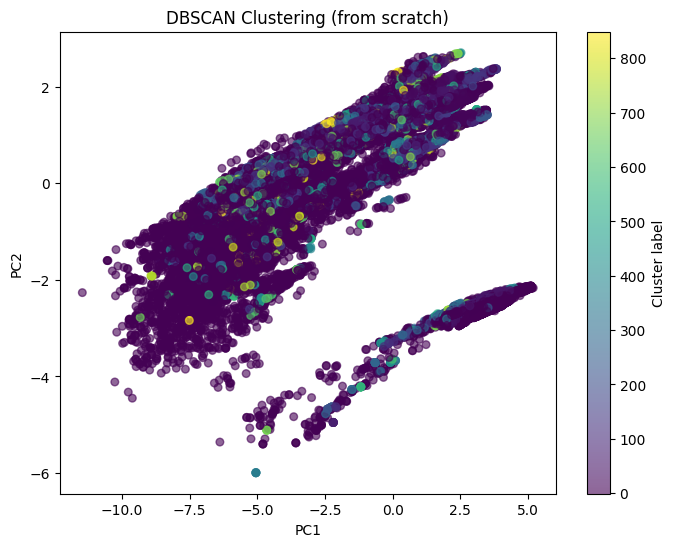

In [ ]:
# ==========================================
# 1️⃣ Imports
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# ==========================================
# 2️⃣ Charger les données
# ==========================================

data_dir = "/content/drive/MyDrive/processed_unsupervised"
df = pd.read_csv(f"{data_dir}/X_scaled.csv")
X = df.values  # Dataset déjà normalisé
print(f"Shape of dataset: {X.shape}")

# ==========================================
# 3️⃣ Implémentation DBSCAN from scratch
# ==========================================
def dbscan(X, eps=0.5, min_samples=5):
    n_samples = X.shape[0]
    labels = np.full(n_samples, -1)  # -1 = bruit
    cluster_id = 0

    def region_query(point_idx):
        # Retourne les indices des points dans le voisinage de eps
        distances = np.linalg.norm(X - X[point_idx], axis=1)
        neighbors = np.where(distances <= eps)[0]
        return neighbors

    def expand_cluster(point_idx, neighbors):
        nonlocal cluster_id
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            n_idx = neighbors[i]

            # Si ce point est encore du bruit, assigner au cluster
            if labels[n_idx] == -1:
                labels[n_idx] = cluster_id

            # Si ce point n'a pas encore été assigné
            if labels[n_idx] == -1:
                labels[n_idx] = cluster_id

            # Si le point est un core point, ajouter ses voisins
            n_neighbors = region_query(n_idx)
            if len(n_neighbors) >= min_samples:
                for nn in n_neighbors:
                    if nn not in neighbors:
                        neighbors = np.append(neighbors, nn)
            i += 1

    for idx in range(n_samples):
        if labels[idx] != -1:
            continue
        neighbors = region_query(idx)
        if len(neighbors) < min_samples:
            labels[idx] = -1  # Bruit
        else:
            expand_cluster(idx, neighbors)
            cluster_id += 1

    return labels

# ==========================================
# 4️⃣ Appliquer DBSCAN
# ==========================================
eps = 0.3
min_samples = 5

labels_dbscan = dbscan(X, eps=eps, min_samples=min_samples)
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = (labels_dbscan == -1).sum()

print(f"Nombre de clusters détectés: {n_clusters}")
print(f"Nombre de points de bruit: {n_noise}")

# ==========================================
# 5️⃣ Métriques
# ==========================================
if n_clusters > 1:
    silhouette_db = silhouette_score(X, labels_dbscan)
    db_index = davies_bouldin_score(X, labels_dbscan)
    ch_index = calinski_harabasz_score(X, labels_dbscan)

    print("\nDBSCAN métriques :")
    print(f"Silhouette Score        : {silhouette_db:.4f}")
    print(f"Davies-Bouldin Index    : {db_index:.4f}")
    print(f"Calinski-Harabasz Index : {ch_index:.4f}")
else:
    print("Impossible de calculer les métriques : moins de 2 clusters.")

# ==========================================
# 6️⃣ Visualisation (PCA)
# ==========================================
if X.shape[1] > 2:
    X_vis = PCA(n_components=2).fit_transform(X)
else:
    X_vis = X

plt.figure(figsize=(8, 6))
plt.scatter(
    X_vis[:, 0],
    X_vis[:, 1],
    c=labels_dbscan,
    cmap='viridis',
    s=30,
    alpha=0.6
)
plt.title("DBSCAN Clustering (from scratch)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster label")
plt.show()


Shape of dataset: (62645, 24)
Shape after PCA: (62645, 5)
eps=0.3, min_samples=5, clusters=317, silhouette=-0.3870
eps=0.3, min_samples=10, clusters=180, silhouette=-0.2400
eps=0.3, min_samples=15, clusters=122, silhouette=-0.2106
eps=0.3, min_samples=20, clusters=100, silhouette=-0.1973
eps=0.3, min_samples=25, clusters=82, silhouette=-0.2034
eps=0.4, min_samples=5, clusters=218, silhouette=-0.2760
eps=0.4, min_samples=10, clusters=89, silhouette=-0.2757
eps=0.4, min_samples=15, clusters=81, silhouette=-0.1615
eps=0.4, min_samples=20, clusters=71, silhouette=-0.2122
eps=0.4, min_samples=25, clusters=54, silhouette=-0.1571
eps=0.5, min_samples=5, clusters=135, silhouette=-0.1675
eps=0.5, min_samples=10, clusters=67, silhouette=-0.1863
eps=0.5, min_samples=15, clusters=54, silhouette=-0.1848
eps=0.5, min_samples=20, clusters=42, silhouette=-0.1614
eps=0.5, min_samples=25, clusters=46, silhouette=-0.1108
eps=0.6, min_samples=5, clusters=70, silhouette=-0.1462
eps=0.6, min_samples=10, clu

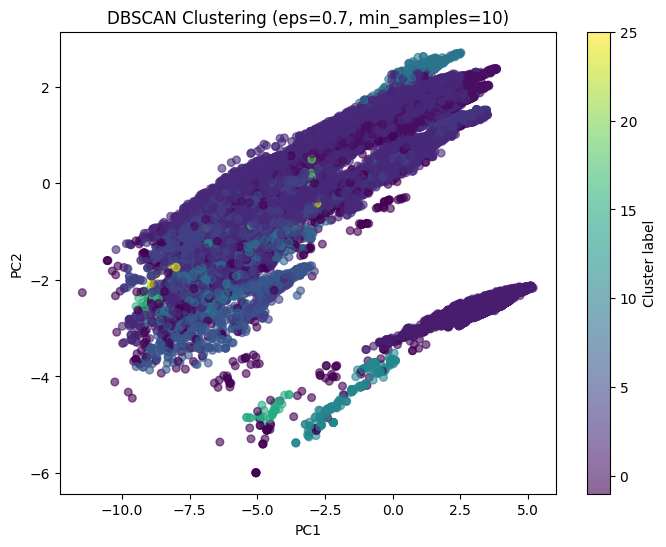

In [ ]:
# ==========================================
# 1️⃣ Imports
# ==========================================
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# ==========================================
# 2️⃣ Charger les données
# ==========================================
data_dir = "/content/drive/MyDrive/processed_unsupervised"
df = pd.read_csv(f"{data_dir}/X_scaled.csv")
X = df.values
print(f"Shape of dataset: {X.shape}")

# ==========================================
# 3️⃣ Réduction de dimension (optionnel)
# ==========================================
# PCA pour accélérer et améliorer la séparation des clusters
n_components = 5  # tu peux tester 2 à 10
X_pca = PCA(n_components=n_components).fit_transform(X)
print(f"Shape after PCA: {X_pca.shape}")

# ==========================================
# 4️⃣ Boucle test eps et min_samples
# ==========================================
eps_values = [0.3, 0.4, 0.5, 0.6, 0.7]
min_samples_values = [5, 10, 15, 20, 25]

best_score = -1
best_params = None
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_pca)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:  # Silhouette nécessite au moins 2 clusters
            score = silhouette_score(X_pca, labels)
            print(f"eps={eps}, min_samples={min_samples}, clusters={n_clusters}, silhouette={score:.4f}")
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels

# ==========================================
# 5️⃣ Résultats optimaux
# ==========================================
if best_params:
    print("\n✅ Meilleure configuration DBSCAN trouvée :")
    print(f"eps = {best_params[0]}, min_samples = {best_params[1]}")
    print(f"Nombre de clusters = {len(set(best_labels)) - (1 if -1 in best_labels else 0)}")
    print(f"Silhouette Score = {best_score:.4f}")

    # Métriques supplémentaires
    db_index = davies_bouldin_score(X_pca, best_labels)
    ch_index = calinski_harabasz_score(X_pca, best_labels)
    print(f"Davies-Bouldin Index = {db_index:.4f}")
    print(f"Calinski-Harabasz Index = {ch_index:.4f}")

    # ==========================================
    # 6️⃣ Visualisation
    # ==========================================
    if X_pca.shape[1] > 2:
        X_vis = PCA(n_components=2).fit_transform(X)
    else:
        X_vis = X

    plt.figure(figsize=(8,6))
    plt.scatter(X_vis[:,0], X_vis[:,1], c=best_labels, cmap='viridis', s=30, alpha=0.6)
    plt.title(f"DBSCAN Clustering (eps={best_params[0]}, min_samples={best_params[1]})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.colorbar(label="Cluster label")
    plt.show()
else:
    print("Impossible de trouver une configuration avec au moins 2 clusters.")
